# Big Dataset (6 month)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TWD3QDBrsn90zxbDom94BF4fR-NOp0Pi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TWD3QDBrsn90zxbDom94BF4fR-NOp0Pi" -O dataset_telecom.zip && rm -rf /tmp/cookies.txt
!unzip /content/dataset_telecom.zip

--2023-11-27 13:50:54--  https://docs.google.com/uc?export=download&confirm=t&id=1TWD3QDBrsn90zxbDom94BF4fR-NOp0Pi
Resolving docs.google.com (docs.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9j2cqssojvgudttt0dt7h65n2638c7ms/1701093000000/15669009389864827016/*/1TWD3QDBrsn90zxbDom94BF4fR-NOp0Pi?e=download&uuid=4919f37d-6ee9-4470-bd11-43a0f0ed72ab [following]
--2023-11-27 13:50:54--  https://doc-0c-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9j2cqssojvgudttt0dt7h65n2638c7ms/1701093000000/15669009389864827016/*/1TWD3QDBrsn90zxbDom94BF4fR-NOp0Pi?e=download&uuid=4919f37d-6ee9-4470-bd11-43a0f0ed72ab
Resolving doc-0c-1g-docs.googleusercontent.com (doc-0c-1g-docs.googleusercontent.com)... 172.217.12.1, 2607:f8b0:4025:

In [ ]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

def update_dic(df_id,file_path_id,columnSorting='start time'):
  dic_id=np.load(file_path_id,allow_pickle=True).item()
  for key in dic_id:
    dic_id[key]=np.append(dic_id[key],df_id[key].to_numpy())
  sorted_idx=dic_id[columnSorting].argsort()
  for key in dic_id:
    dic_id[key]=dic_id[key][sorted_idx]
  return dic_id

def update_dic(df_id,dataset_dic,id):
  dic_id=dataset_dic[id]
  for key in dic_id:
    dic_id[key]=np.append(dic_id[key],df_id[key].to_numpy())
  return dic_id

def sort_dic_id(dic_id,columnSorting='start time'):
  sorted_idx=dic_id[columnSorting].argsort()
  for key in dic_id:
    dic_id[key]=dic_id[key][sorted_idx]
  return dic_id

def create_dic(df_id,drop_column=['month','date','user id']):
  dic_id={}
  for name in df_id.columns:
    if name not in drop_column :
      dic_id[name]=df_id[name].to_numpy()
  return dic_id

def extract_data_in_dic(file_path,dataset_dic):
  df=pd.read_excel(file_path)
  os.makedirs('./TelecomDataset',exist_ok=True)
  grouped_id=df.groupby('user id')

  for id,df_id in grouped_id:

    if id in dataset_dic :
      dic_id=update_dic(df_id, dataset_dic,id)
    else:
      dic_id=create_dic(df_id)
    dic_id=sort_dic_id(dic_id,columnSorting='start time')
    dataset_dic[id]=dic_id
  return dataset_dic

def extract_data(file_path):
  df=pd.read_excel(file_path)
  os.makedirs('./TelecomDataset',exist_ok=True)
  grouped_id=df.groupby('user id')
  for id,df_id in grouped_id:
    file_path_id=os.path.join('.','TelecomDataset',id+'.npy')
    if os.path.isfile(file_path_id):
      dic_id=update_dic(df_id, file_path_id)
    else:
      dic_id=create_dic(df_id)
    np.save(file_path_id,dic_id)

dataset_dic={}
os.makedirs("TelecomDataset",exist_ok=True)
for file in os.listdir("."):

    if file.endswith(".xlsx"):
      print(file)
      dataset_dic= extract_data_in_dic(os.path.join(".", file),dataset_dic)
    np.save("./TelecomDataset/dataset_dic.npy",dataset_dic)




data_6.16~6.30.xlsx
data_9.16~9.30.xlsx
data_10.1~10.15.xlsx
data_7.1~7.15.xlsx
data_10.16~10.31.xlsx
data_8.1~8.15.xlsx
data_6.1~6.15.xlsx
data_11.16~11.30.xlsx
data_9.1~9.15.xlsx
data_7.16~7.31.xlsx
data_8.16~8.31.xlsx
data_11.1~11.15.xlsx


In [ ]:
def delete_overlaps_dataset(dataset_dic):
  for id in dataset_dic:
    dic_id=dataset_dic[id]
    dic_id=delete_overlaps_id(dic_id)
    dataset_dic[id]=dic_id
  return dataset_dic

def delete_overlaps_id(dic_id):
  for i in range(len(dic_id['start time'])-1):
    if dic_id['start time'][i+1]<dic_id['end time'][i]:
      dic_id['end time'][i]=dic_id['start time'][i+1]
  return dic_id

def convervt_id_to_idx(dataset_dic):
  dataset_dic_idx={}
  list_id=[]
  for idx,id in enumerate(dataset_dic):
    dataset_dic_idx[idx]=dataset_dic[id]
    list_id.append(id)

  return dataset_dic_idx, list_id
def get_dic_station(dataset_dic):
  dic_station={}
  list_station=[]
  for i in dataset_dic:

    latitudes=dataset_dic[i]["latitude"]
    longitudes=dataset_dic[i]["longitude"]
    for position in zip(latitudes,longitudes):
      if np.isnan(position[0]):
        position=(np.float64(-1),position[1])
      if np.isnan(position[1]):
        position=(position[0],np.float64(-1))
      if position in dic_station:
        dic_station[position]["number"]+=1
      else:
        dic_station[position]={}
        dic_station[position]["number"]=1
        list_station.append(position)
        dic_station[position]["idx"]=len(list_station)-1

  return dic_station, list_station
def add_class(dataset_dic,dic_station):
  for idx in dataset_dic:
    latitudes=dataset_dic[idx]["latitude"]
    longitudes=dataset_dic[idx]["longitude"]
    for position in zip(latitudes,longitudes):
      if np.isnan(position[0]):
          position=(np.float64(-1),position[1])
      if np.isnan(position[1]):
          position=(position[0],np.float64(-1))
      dataset_dic[idx]["class"]=dic_station[position]["idx"]
  return dataset_dic

def get_mean_connect_time(dataset_dic):
  total_nb=0
  sum=0
  for idx in dataset_dic:
    start_times=dataset_dic[idx]["start time"]
    end_times=dataset_dic[idx]["end time"]
    total_nb+=len(start_times)
    sum+=(end_times-start_times).sum().astype('timedelta64[s]')

  return sum/total_nb




# Small Dataset (15 days)

In [ ]:
!wget http://sguangwang.com/dataset/telecom.zip
!unzip /content/telecom.zip

--2024-01-16 14:09:26--  http://sguangwang.com/dataset/telecom.zip
Resolving sguangwang.com (sguangwang.com)... 182.50.151.114
Connecting to sguangwang.com (sguangwang.com)|182.50.151.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53432897 (51M) [application/x-zip-compressed]
Saving to: ‘telecom.zip’

telecom.zip         100%[===================>]  50.96M  15.1MB/s    in 4.5s    

2024-01-16 14:09:31 (11.4 MB/s) - ‘telecom.zip’ saved [53432897/53432897]



## read Small dataset


In [ ]:
import pandas
df_xlsx=pandas.read_excel("/content/dataset-telecom/data_6.1~6.30_.xlsx")

In [ ]:
df_xlsx.sort_values('start time')

AttributeError: 'DataFrame' object has no attribute 'dt'

<Axes: xlabel='start time,start time,start time,start time'>

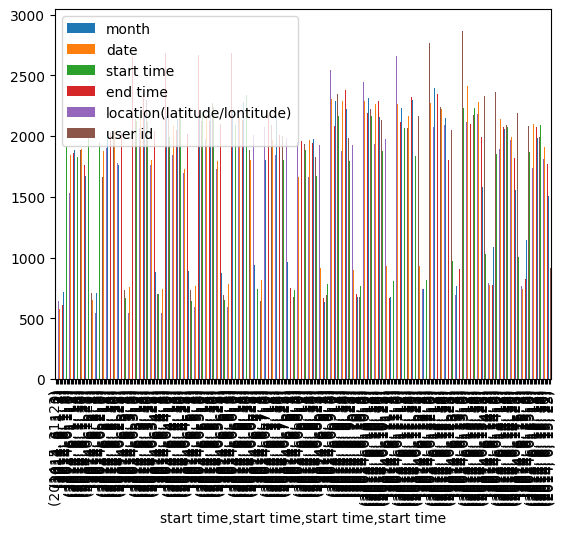

22.522803/114.218796
24.284812/102.999068
25.222206/117.086322
26.139329/103.078562
26.215115/109.744661
28.738742/120.640606
28.812629/115.952954
29.151779/120.985563
29.263844/115.023159
29.526266/119.910488
30.442177/120.618727
30.679943/104.067923
30.705762/121.33512
30.715526/121.351073
30.716044/121.291037
30.716187/121.349498
30.718108/121.283169
30.718302/121.314644
30.719537/121.355948
30.719644/121.345988
30.721392/121.345766
30.723654/121.330778
30.72456/121.344043
30.730296/121.342643
30.730789/121.343497
30.731903/121.334173
30.733903/121.341904
30.73407/121.350673
30.734301/121.25722
30.735262/121.351726
30.735272/121.380359
30.735389/121.358248
30.736093/121.355957
30.736314/121.354852
30.738649/121.382934
30.739639/121.373695
30.739797/121.32739
30.741272/121.3348
30.74139/121.380141
30.741693/121.367052
30.746286/121.344028
30.747024/121.287991
30.747936/121.348822
30.749894/121.270796
30.750457/121.376839
30.751838/121.360056
30.758612/121.320541
30.763589/121.264689


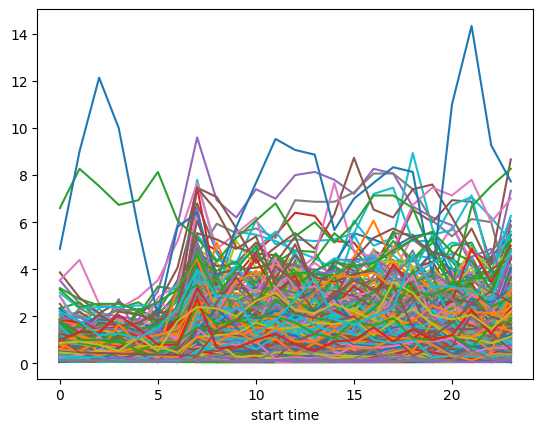

In [ ]:
grouped_id=df_xlsx.groupby('location(latitude/lontitude)')
i=0
for id,df_id in grouped_id:
  #print(id)
  (df_id.groupby([df_id["start time"].dt.hour])["start time"].count()/15).plot()
  i+=1
  if i>=1000:
    break


In [ ]:
grouped_id

In [ ]:
dataset_dic=np.load("./TelecomDataset/dataset_dic.npy",allow_pickle=True)

In [ ]:
dataset_dic.item()

In [ ]:
(np.float64(-1),np.float64('nan'))==(np.float64('nan'),np.float64('nan'))

True

In [ ]:
dataset_dic=delete_overlaps_dataset(dataset_dic)

In [ ]:
dataset_dic, list_id = convervt_id_to_idx(dataset_dic)

In [ ]:
dic_station, list_station=get_dic_station(dataset_dic)

In [ ]:
dataset_dic=add_class(dataset_dic,dic_station)

In [ ]:
idx=2
start_times=dataset_dic[idx]["start time"]
end_times=dataset_dic[idx]["end time"]
nb_time_step_connections=((end_times-start_times).astype('timedelta64[m]')//15)
nb_time_step_btwn_connections=((end_times[1:]-start_times[:-1]).astype('timedelta64[m]')//15)

In [ ]:
print(nb_time_step_connections,nb_time_step_btwn_connections)

[ 1  0  2  1  0  1  0  0  0  0  0  0  1  1  6  0  1  0  6  0  0  2  0  0
 11 11  1  0 11  0  0  1  0  0  0  0 11 11  2  6 11  2  4 10  3  2 11  0
 10  2  8  3  0  1  0  0 11  8  1  1  0  2  0 11  3 10  0  1  0  0  0  0
  2 11 11 11  2  1  1  0  0  0 11  6 11 11  7  3  0  7  0  0  0  0  0  2
  0  1  3  0  0  0  0  1 11  4 11 11  2  7  7  1  0  2  4  0  0 11  1  0
  0 11  0  0  0  0 11  2  3  1  0  2  0  0  0  1  0  1  0  2  1  1  0  2
  0  2  0 10  0  2  0  0  1  0  0  2  0  1 11  4  3  0  2  0  0  1  1  0
  5  0  2  0  0  1  0  0  1  5  0  0  1  0  0  0  0  1  1  7  0  2  2  0
  0  3  2  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  3  0  0  0  0  0
  0  0  0  0  0  6  2  1  3  0  1  0  2  0  0  0  0  4  0  0  0  0  2  0
  0  0  0  0  0  0  0  4  0  0  0  0  0  3  0  0  0  0  0  0  1  0  2  2
  3  0  1  1  0  2  0  0  1  0  4  1  0  3  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  1  0  1  0  0  0  0  0  0  0  1  0  1  0  5  0  0  0  0  0
  0  0  5  0  2  1  1  0  3  0  0  0  0  1  0  0  1

In [ ]:
mean=get_mean_connect_time(dataset_dic)

In [ ]:
mean

numpy.timedelta64(1882,'s')

In [ ]:
print((dataset_dic[2]['end time'][0]-dataset_dic[2]['start time'][0]).astype('timedelta64[m]'))


22 minutes


In [ ]:
32//15

2

In [ ]:
import numpy as np
np.arange(100).reshape(10,10).reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
def blank_name(dataset_dic,idx)
    start_times=dataset_dic[idx]["start time"]
    end_times=dataset_dic[idx]["end time"]
    nb_time_step_connections=((end_times-start_times).astype('timedelta64[m]')//15).int()
    nb_time_step_btwn_connections=((end_times[1:]-start_times[:-1]).astype('timedelta64[m]')//15).int()
    repmat(


In [ ]:

class TimeSeriesDataset(Dataset):
    """
    PyTorch Dataset for the time series data.
    """

    def __init__(self, dataset_dic, input_sequence_len, output_size=1, nan_started=0, nan_stopped=0, missing_indices=np.array([])):
        self.data = dataset_dic
        self.input_sequence_len = input_sequence_len
        self.output_size = output_size
        self.nan_started = nan_started
        self.missing_data_len = nan_stopped - nan_started
        self.missing_indices = missing_indices

    def __len__(self):
        return len(self.data) - 2*self.input_sequence_len - 2*self.output_size - self.missing_data_len

    def __getitem__(self, idx):
        self.data =
        dic_idx= self.data[idx]
        =dic_idx['start time']
        stop_sequence_idx = start_idx + self.input_sequence_len
        stop_target_idx = stop_sequence_idx + self.output_size
        # If considered sequence intersects with the missing value list [11122, .... ,11133]
        # jump to 11134 index
        if np.intersect1d(np.arange(start_idx, stop_target_idx), self.missing_indices).size > 0:
          start_idx = self.missing_indices[-1] + 1

        # Avoid the missing data range
        if stop_target_idx >= self.nan_started :
            start_idx += self.missing_data_len + self.input_sequence_len + self.output_size
            stop_sequence_idx = start_idx + self.input_sequence_len
            stop_target_idx = stop_sequence_idx + self.output_size
        # Extracting a sequence of data
        # YOUR CODE HERE
        assert sequence.shape[0] == self.input_sequence_len
        assert target.shape[0] == self.output_size
        return {'sequence': torch.Tensor(sequence), 'target': torch.Tensor(target)}

NameError: ignored

In [ ]:
nb=0
nb2=0
nb3=0
nb4=0
for id in dataset_dic:
  dic_id=dataset_dic[id]
  startarray=dic_id['start time']
  endarray=dic_id['end time']
  lattitude_array=dic_id['latitude']
  for i in range(len(startarray)-1):
    if startarray[i]>endarray[i]:
      nb4+=0
      print("element :"+str(i)+" of id: "+id)
    if startarray[i+1]<endarray[i]:
      nb+=1
    else:
      nb2+=1
    if startarray[i+1]<endarray[i] and lattitude_array[i]!=lattitude_array[i+1]:
      nb3+=1
    if startarray[i+1]<startarray[i]:
      nb+=0
      print("not sorted")
print(nb,nb2,nb3,nb4)


0 6943182 0 0


KeyError: ignored

In [ ]:
nb4

0

In [ ]:
import numpy as np
df=df.loc[np.isnan(df['latitude'])==False]
print(df)

df['month'] = df["start time"].dt.month
df['day'] = df["start time"].dt.day
df['hour'] = df["start time"].dt.hour
df['minute'] = df["start time"].dt.minute
df['second'] = df["start time"].dt.second
df['year'] = df["start time"].dt.year

df_encoded = df

df_encoded['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df_encoded['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df_encoded['day_sin'] = np.sin(2 * np.pi * df['hour'] / 31)
df_encoded['day_cos'] = np.cos(2 * np.pi * df['hour'] / 31)

df_encoded['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df_encoded['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df_encoded['minute_sin'] = np.sin(2 * np.pi * df['hour'] / 60)
df_encoded['minute_cos'] = np.cos(2 * np.pi * df['hour'] / 60)

df_encoded['second_sin'] = np.sin(2 * np.pi * df['hour'] / 60)
df_encoded['second_cos'] = np.cos(2 * np.pi * df['hour'] / 60)

# Normalise the temperatures into a range of [0, 1],
# to ensure that all input features are on a similar scale
min_latitude = df_encoded['latitude'].min()
max_latitude = df_encoded['latitude'].max()
df_encoded['latitude'] = (df_encoded['latitude'] - min_latitude) / (max_latitude - min_latitude)

min_latitude = df_encoded['longitude'].min()
max_latitude = df_encoded['longitude'].max()
df_encoded['longitude'] = (df_encoded['longitude'] - min_latitude) / (max_latitude - min_latitude)

# Remove unused columns
columns_to_drop = ['year','month','hour','second','minute','date']
df_encoded = df_encoded.drop(columns=columns_to_drop, axis=1)
df_encoded

        month  date          start time            end time   latitude  \
205        10    16 2014-10-16 11:44:35 2014-10-16 11:53:03  31.246946   
206        10    16 2014-10-16 12:08:07 2014-10-16 12:18:56  31.246946   
207        10    16 2014-10-16 08:59:32 2014-10-16 11:00:51  31.246946   
208        10    16 2014-10-16 14:29:49 2014-10-16 14:43:32  31.246946   
209        10    16 2014-10-16 16:08:41 2014-10-16 16:11:17  31.246946   
...       ...   ...                 ...                 ...        ...   
575569     10    31 2014-10-31 14:57:37 2014-10-31 15:01:11  31.087196   
575570     10    31 2014-10-31 14:46:40 2014-10-31 14:48:38  31.087196   
575571     10    31 2014-10-31 15:12:59 2014-10-31 15:14:27  31.087196   
575572     10    31 2014-10-31 16:59:06 2014-10-31 17:00:30  31.087196   
575573     10    31 2014-10-31 15:17:47 2014-10-31 15:19:46  31.087196   

        longitude                           user id  day  hour  minute  ...  \
205      0.654516  b6f11a26170aa

,start time,end time,latitude,longitude,user id,day,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,minute_sin,minute_cos,second_sin,second_cos,latitute
205,2014-10-16 11:44:35,2014-10-16 11:53:03,0.359689,0.654516,b6f11a26170aabb49062f79b03818bf2,16,-0.866025,0.5,0.790776,-0.612106,2.588190e-01,-0.965926,0.913545,4.067366e-01,0.913545,4.067366e-01,0.359689
206,2014-10-16 12:08:07,2014-10-16 12:18:56,0.359689,0.654516,b6f11a26170aabb49062f79b03818bf2,16,-0.866025,0.5,0.651372,-0.758758,1.224647e-16,-1.000000,0.951057,3.090170e-01,0.951057,3.090170e-01,0.359689
207,2014-10-16 08:59:32,2014-10-16 11:00:51,0.359689,0.654516,c150c622280f1d6e32dd45e7c59ed751,16,-0.866025,0.5,0.998717,-0.050649,8.660254e-01,-0.500000,0.743145,6.691306e-01,0.743145,6.691306e-01,0.359689
208,2014-10-16 14:29:49,2014-10-16 14:43:32,0.359689,0.654516,b6f11a26170aabb49062f79b03818bf2,16,-0.866025,0.5,0.299363,-0.954139,-5.000000e-01,-0.866025,0.994522,1.045285e-01,0.994522,1.045285e-01,0.359689
209,2014-10-16 16:08:41,2014-10-16 16:11:17,0.359689,0.654516,b6f11a26170aabb49062f79b03818bf2,16,-0.866025,0.5,-0.101168,-0.994869,-8.660254e-01,-0.500000,0.994522,-1.045285e-01,0.994522,-1.045285e-01,0.359689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575569,2014-10-31 14:57:37,2014-10-31 15:01:11,0.353103,0.654231,ec4591ee193aa81f11e60f1962d472df,31,-0.866025,0.5,0.299363,-0.954139,-5.000000e-01,-0.866025,0.994522,1.045285e-01,0.994522,1.045285e-01,0.353103
575570,2014-10-31 14:46:40,2014-10-31 14:48:38,0.353103,0.654231,ec4591ee193aa81f11e60f1962d472df,31,-0.866025,0.5,0.299363,-0.954139,-5.000000e-01,-0.866025,0.994522,1.045285e-01,0.994522,1.045285e-01,0.353103
575571,2014-10-31 15:12:59,2014-10-31 15:14:27,0.353103,0.654231,ec4591ee193aa81f11e60f1962d472df,31,-0.866025,0.5,0.101168,-0.994869,-7.071068e-01,-0.707107,1.000000,2.832769e-16,1.000000,2.832769e-16,0.353103
575572,2014-10-31 16:59:06,2014-10-31 17:00:30,0.353103,0.654231,ec4591ee193aa81f11e60f1962d472df,31,-0.866025,0.5,-0.101168,-0.994869,-8.660254e-01,-0.500000,0.994522,-1.045285e-01,0.994522,-1.045285e-01,0.353103


In [ ]:
import numpy as np
np.float64("Nan")

nan

In [ ]:
df.loc[np.isnan(df['latitude'])==False]

,month,date,start time,end time,latitude,longitude,user id
205,201410,16,2014-10-16 11:44:35,2014-10-16 11:53:03,31.246946,121.513919,b6f11a26170aabb49062f79b03818bf2
206,201410,16,2014-10-16 12:08:07,2014-10-16 12:18:56,31.246946,121.513919,b6f11a26170aabb49062f79b03818bf2
207,201410,16,2014-10-16 08:59:32,2014-10-16 11:00:51,31.246946,121.513919,c150c622280f1d6e32dd45e7c59ed751
208,201410,16,2014-10-16 14:29:49,2014-10-16 14:43:32,31.246946,121.513919,b6f11a26170aabb49062f79b03818bf2
209,201410,16,2014-10-16 16:08:41,2014-10-16 16:11:17,31.246946,121.513919,b6f11a26170aabb49062f79b03818bf2
...,...,...,...,...,...,...,...
575569,201410,31,2014-10-31 14:57:37,2014-10-31 15:01:11,31.087196,121.505435,ec4591ee193aa81f11e60f1962d472df
575570,201410,31,2014-10-31 14:46:40,2014-10-31 14:48:38,31.087196,121.505435,ec4591ee193aa81f11e60f1962d472df
575571,201410,31,2014-10-31 15:12:59,2014-10-31 15:14:27,31.087196,121.505435,ec4591ee193aa81f11e60f1962d472df
575572,201410,31,2014-10-31 16:59:06,2014-10-31 17:00:30,31.087196,121.505435,ec4591ee193aa81f11e60f1962d472df
